# MODEL INITIAL

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

'2.4.1'

In [2]:
dataset_train = keras.preprocessing.image_dataset_from_directory("./coins/coins/data/train/", labels='inferred', image_size=[128,128])
dataset_valid = keras.preprocessing.image_dataset_from_directory("./coins/coins/data/validation/", labels='inferred', image_size=[128,128])
dataset_test = keras.preprocessing.image_dataset_from_directory("./coins/coins/data/test/", labels='inferred', image_size=[128,128])

Found 246 files belonging to 8 classes.
Found 34 files belonging to 8 classes.
Found 32 files belonging to 8 classes.


In [3]:
dataset_train

<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

## Essais non concluant (unbatch) :

In [28]:
x = list(dataset_train.unbatch())

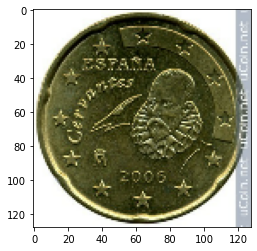

In [29]:
img = x[105][0].numpy()
img = img.astype(int)
plt.imshow(img)

## Suite :

In [6]:
train_it = dataset_train.as_numpy_iterator()
valid_it = dataset_valid.as_numpy_iterator()

In [7]:
(x_train, y_train) = train_it.next()
(x_valid, y_valid) = valid_it.next()

(4, (32, 128, 128, 3), (32, 128, 128, 3))

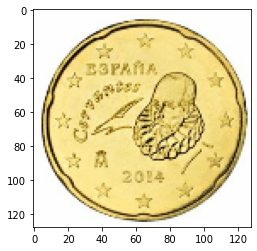

In [8]:
plt.imshow(x_train[31].astype(int))
y_train[31], x_train.shape, x_valid.shape

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[128,128,3])) #applatit la matrice de 128*128*3 en une suite d'élément
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               9830600   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 808       
Total params: 9,851,508
Trainable params: 9,851,508
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.005), metrics=["accuracy"])

In [27]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1/1 [==============================] - 0s 149ms/step - loss: 2.0502 - accuracy: 0.1562 - val_loss: 69080.3750 - val_accuracy: 0.1250
Epoch 2/10
1/1 [==============================] - 0s 106ms/step - loss: 2.0495 - accuracy: 0.1562 - val_loss: 69080.3750 - val_accuracy: 0.1250
Epoch 3/10
1/1 [==============================] - 0s 103ms/step - loss: 2.0487 - accuracy: 0.1562 - val_loss: 69080.3750 - val_accuracy: 0.1250
Epoch 4/10
1/1 [==============================] - 0s 103ms/step - loss: 2.0480 - accuracy: 0.1562 - val_loss: 69080.3750 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 0s 98ms/step - loss: 2.0473 - accuracy: 0.1562 - val_loss: 69080.3906 - val_accuracy: 0.1250
Epoch 6/10
1/1 [==============================] - 0s 112ms/step - loss: 2.0466 - accuracy: 0.1562 - val_loss: 69080.3906 - val_accuracy: 0.1250
Epoch 7/10
1/1 [==============================] - 0s 101ms/step - loss: 2.0460 - accuracy: 0.1562 - val_loss: 69080.3984 - val_accuracy: 